In [2]:
!pip install xgboost

In [3]:
! pip install ace_tools

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, roc_curve, roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.multiclass import OneVsRestClassifier
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.patches as mpatches
from scipy.stats import mode
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from xgboost import XGBClassifier
import tensorflow as tf
from sklearn import tree
from sklearn.metrics import accuracy_score, f1_score, recall_score
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.calibration import calibration_curve
from sklearn.linear_model import SGDClassifier
from mpl_toolkits.mplot3d import Axes3D

In [5]:
df = pd.read_csv(r"D:\Downloads\final_df_renamed.csv")
df.columns

Index(['Participant ID', 'Record ID', 'Visit ID', 'SLEEP PROBLEMS (NIGHT)',
       'DAYTIME SLEEPINESS', 'PAIN AND OTHER SENSATIONS', 'URINARY PROBLEMS',
       'CONSTIPATION PROBLEMS', 'LIGHTHEADEDNESS ON STANDING', 'FATIGUE',
       'SPEECH', 'SALIVA + DROOLING', 'CHEWING AND SWALLOWING', 'EATING TASKS',
       'DRESSING', 'HYGIENE', 'HANDWRITING',
       'DOING HOBBIES AND OTHER ACTIVITIES', 'TURNING IN BED', 'TREMOR',
       'GETTING OUT OF BED, CAR, OR DEEP CHAIR', 'WALKING AND BALANCE',
       'FREEZING', '3.1 Speech', '3.2 Facial expression',
       '3.3a Rigidity - Neck', '3.3b Rigidity - RUE', '3.3c Rigidity - LUE',
       '3.3d Rigidity - RLE', '3.3e Rigidity - LLE',
       '3.4a Finger Tapping Right Hand', '3.4b Finger Tapping Left Hand',
       '3.5a Hand movements - Right Hand', '3.5b Hand movements - Left Hand',
       '3.6a Pronation-Supination - Right Hand',
       '3.6b Pronation-Supination - Left Hand',
       '3.7a Toe tapping - Right foot', '3.7b Toe tapping - Left 

In [13]:
# Try Sum method instead of mean
# Define the categories and the symptoms that fall under each one
categories = {
    'Rigidity': ['3.3a Rigidity - Neck', '3.3b Rigidity - RUE', '3.3c Rigidity - LUE', 
                 '3.3d Rigidity - RLE', '3.3e Rigidity - LLE'],
    'Tremor': ['3.15a Postural tremor - Right Hand', '3.15b Postural tremor - Left hand',
               '3.16a Kinetic tremor - Right hand', '3.16b Kinetic tremor - Left hand',
               '3.17a Rest tremor amplitude - RUE', '3.17b Rest tremor amplitude - LUE',
               '3.17c Rest tremor amplitude - RLE', '3.17d Rest tremor amplitude - LLE',
               '3.17e Rest tremor amplitude - Lip/jaw'],
    'Motor Function': ['3.4a Finger Tapping Right Hand', '3.4b Finger Tapping Left Hand',
                       '3.5a Hand movements - Right Hand', '3.5b Hand movements - Left Hand',
                       '3.6a Pronation-Supination - Right Hand', '3.6b Pronation-Supination - Left Hand',
                       '3.7a Toe tapping - Right foot', '3.7b Toe tapping - Left foot',
                       '3.8a Leg agility - Right leg', '3.8b Leg agility - Left leg'],
    'Posture and Gait': ['3.9 Arising from chair', '3.10 Gait', '3.11 Freezing of gait',
                         '3.12 Postural stability', '3.13 Posture'],
    'Non-Motor Symptoms': ['DAYTIME SLEEPINESS', 'PAIN AND OTHER SENSATIONS', 'URINARY PROBLEMS', 
                           'CONSTIPATION PROBLEMS', 'LIGHTHEADEDNESS ON STANDING', 'FATIGUE',
                           'SPEECH', 'SALIVA + DROOLING', 'CHEWING AND SWALLOWING', 'EATING TASKS',
                           'DRESSING', 'HYGIENE', 'HANDWRITING', 'DOING HOBBIES AND OTHER ACTIVITIES',
                           'TURNING IN BED']
}

# Create new columns for the sum values of each category
for category, symptoms_list in categories.items():
    df[category + ' Sum'] = df[symptoms_list].sum(axis=1)

df_sum = df[['Participant ID','Visit ID','Rigidity Sum', 'Tremor Sum', 'Motor Function Sum', 'Posture and Gait Sum', 'Non-Motor Symptoms Sum','Decoded Value for COHORT']]
df_sum = df[df["Decoded Value for COHORT"] != "SWEDD"]
output_path = r"D:\Downloads\sum_df.csv"
df_sum.to_csv(output_path, index=False)

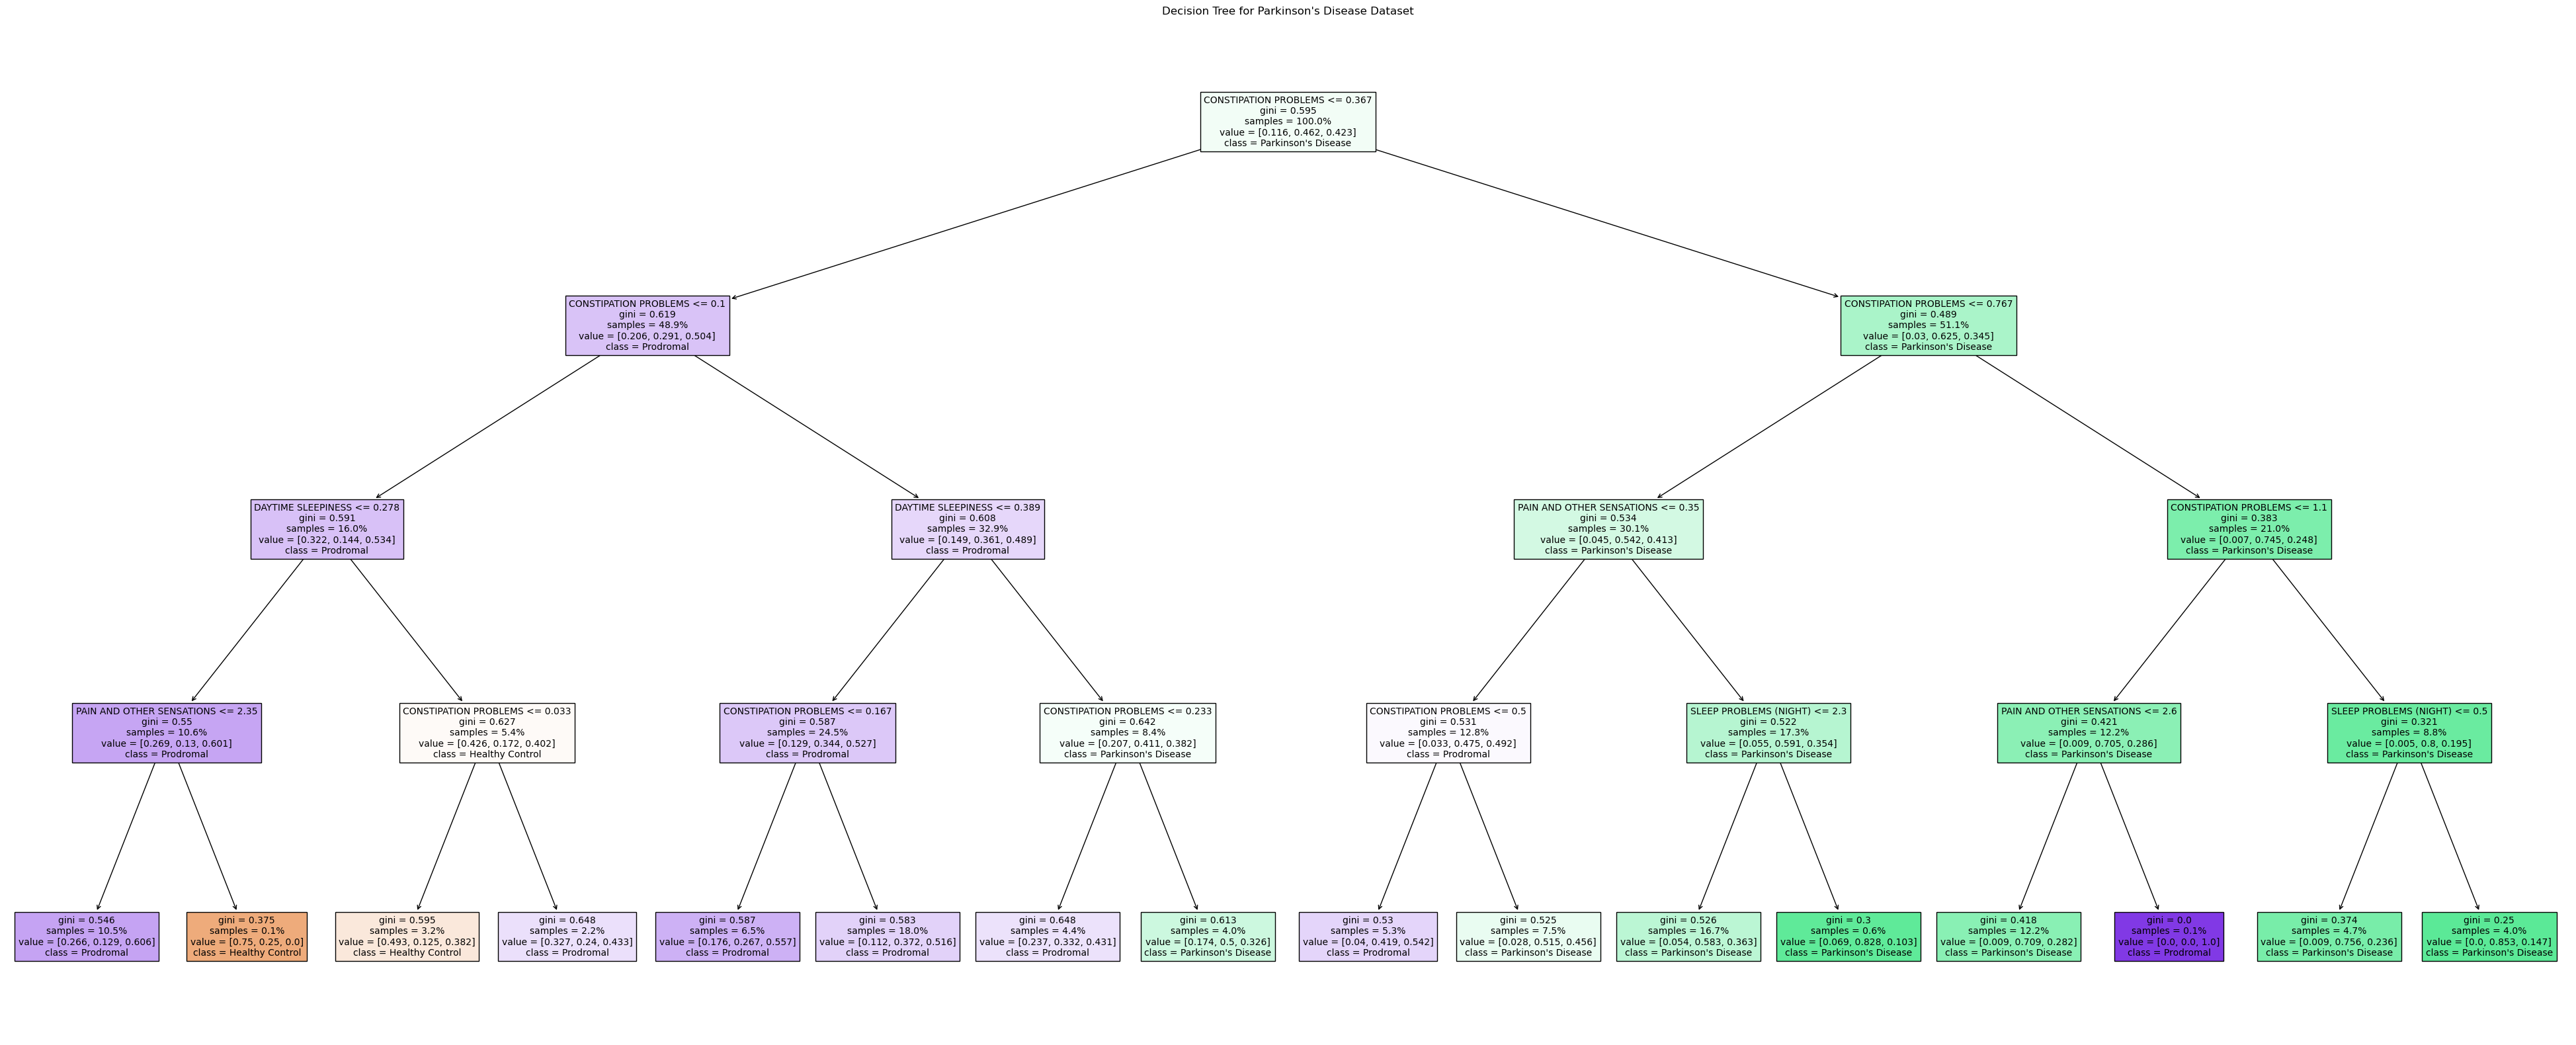

In [15]:
# Check if the columns exist before dropping them and handle missing values
columns_to_drop = ["Participant ID", "Visit ID", "Record ID"]

# Drop the columns if they exist, and drop any rows with missing values
df_sum = df_sum.drop(columns=[col for col in columns_to_drop if col in df_sum.columns]).dropna()
# Separate features (X) and target (y)
X_filtered = df_sum.drop(columns=["Decoded Value for COHORT"])
y_filtered = df_sum["Decoded Value for COHORT"]

# Re-encode the target variable
y_filtered_encoded = label_encoder.fit_transform(y_filtered)

# Split the filtered data into training and testing sets
X_train_filtered, X_test_filtered, y_train_filtered, y_test_filtered = train_test_split(
    X_filtered, y_filtered_encoded, test_size=0.3, random_state=42
)

# Train the decision tree model with the filtered data
decision_tree_adjusted_sum = DecisionTreeClassifier(random_state=42, max_depth=5)
decision_tree_adjusted_sum.fit(X_train_filtered, y_train_filtered)


# Adjusting the decision tree visualization to improve readability by reducing font size and controlling layout
plt.figure(figsize=(50, 20))
tree.plot_tree(
    decision_tree_adjusted,
    feature_names=X_filtered.columns,
    class_names=label_encoder.classes_,
    filled=True,
    fontsize=10,  # Smaller font size for readability
    proportion=True,  # Scale boxes based on samples in each node
)
plt.title("Decision Tree for Parkinson's Disease Dataset")
plt.show()